In [4]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]='2'
from scipy.optimize import curve_fit
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json
# import cs2excel2py

# folder = "D:/Files/数据集/U Maryland CALCE/U Maryland CALCE A123 CS2/CS2/Type 1/CS2_33"
y_data = np.array(json.loads(open('./cs2list.txt').read()))
x_data = range(0, y_data.size)
# slis = range(0,y_data.size)

y_test = np.array(json.loads(open('./cs2list_test.txt').read()))
x_test = range(0, y_test.size)
def ar_least_square(sample,p):
    matrix_x = np.zeros((sample.size-p,p))
    matrix_x = np.matrix(matrix_x)
    array=sample.reshape(sample.size)
    j=0
    for i in range(0,sample.size-p):
	    matrix_x[i,0:p]=array[j:j+p]
	    j=j+1
    matrix_y=np.array(array[p:sample.size])
    matrix_y=matrix_y.reshape(sample.size-p,1)
    matrix_y=np.matrix(matrix_y)
    #fi为参数序列
    fi=np.dot(np.dot((np.dot(matrix_x.T,matrix_x)).I,matrix_x.T),matrix_y)
    matrix_y=np.dot(matrix_x,fi)
    matrix_y=np.row_stack((array[0:p].reshape(p,1),matrix_y))
    return fi,matrix_y

def func(x,a,b,c):
    return a*x*x+b*x+c

slis_popt = {}
def get_KT(sli,x_data,y_data):
    y_data_sli = y_data[0:sli]
    y_data_mat = np.matrix(y_data_sli).T
    fi, matrix_y = ar_least_square(y_data_sli, 4)

    KTR = []

    # y_test = (np.matrix(y_data).T)[0:4]
    # for i in x_data[4:]:
    #     y0 = np.dot(((np.matrix(y_data))[:, i-4:i]), fi)
    #     y_test = np.vstack((y_test,np.matrix(y0)))

    # print(y_data[199])
    # print(y_test[200])
    for i in x_data[sli:]:
        y0 = np.dot(y_data_mat[-4:, :].T, fi)
        # print(y0)
        # print(y_data[i])
        y_data_mat = np.vstack((y_data_mat, np.matrix(y0)))
        KTR.append(y_data[i] / y0)
    # for i,value in enumerate(KTR):
    #     KTR[i] = round(value[0,0],1)
    # KTR = np.array(KTR).astype(np.int)
    # y_data_mat_pr = y_data_mat
    popt, pcov = curve_fit(func, np.arange(1, y_data.size - sli + 1), np.squeeze(KTR), maxfev=50000)
    a = popt[0]
    b = popt[1]
    c = popt[2]
    for i in x_data[sli:]:
        y_data_mat[i, 0] = y_data_mat[i, 0] * func(i - sli + 1, a, b, c)
        # AE.append(y_data_mat[i, 0] - y_data[i])
    return popt,y_data_mat

In [5]:
sli = 200
y_test_sli = y_test[0:sli]
y_test_mat = np.matrix(y_test_sli).T

for i,value in enumerate(y_data):
    if (y_test_sli[sli - 1]/y_test[0]) > (y_data[i]/y_data[0]):
        pr_sli = i
        break
popt,y_data_mat = get_KT(pr_sli,x_data,y_data)
# for key,value in slis_popt:
#     if y_test[sli]/y_test[0]<key:
#         popt = value
#         break
a = popt[0]
b = popt[1]
c = popt[2]
fi, matrix_y = ar_least_square(y_test_sli, 4)

MSE =  0.00026387321373869967


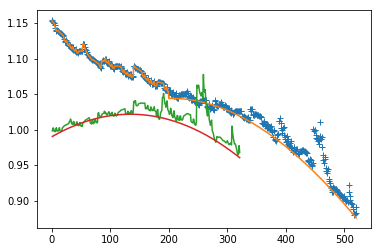

In [6]:
KTR = []

# y_test = (np.matrix(y_data).T)[0:4]
# for i in x_data[4:]:
#     y0 = np.dot(((np.matrix(y_data))[:, i-4:i]), fi)
#     y_test = np.vstack((y_test,np.matrix(y0)))

# print(y_data[199])
# print(y_test[200])
for i in x_test[sli:]:
    y0 = np.dot(y_test_mat[-4:, :].T, fi)
    # print(y0)
    # print(y_data[i])
    y_test_mat = np.vstack((y_test_mat, np.matrix(y0)))
    KTR.append(y_test[i] / y0)
KTR = np.array(KTR)

AE = []
for i in x_test[sli:]:
    y_test_mat[i, 0] = y_test_mat[i, 0] * func(i - sli + 1, a, b, c)
    AE.append(y_test_mat[i, 0] - y_test[i])


SE = 0
i = 0
while i < len(AE):
    SE += AE[i]*AE[i]
    i += 1
MSE = SE/len(AE)

with tf.Session() as sess:
    # sess.run(init)
    # #初始化W和b是多少
    print('MSE = ',MSE )
    # #执行20次训练
    # for step in range(20):
    #     sess.run(train)
    #     #输出训练好的W和b
    #     print('W=', sess.run(W), 'b=', sess.run(b), 'loss=', sess.run(loss))
    plt.plot(x_test, y_test, '+')      #散点图
    plt.plot(x_test,y_test_mat)
    plt.plot(np.arange(1,y_test.size - sli + 1), np.squeeze(KTR))
    # plt.plot(x_data, y_data, '+')      #散点图
    # plt.plot(x_data,y_data_mat)
    # plt.plot(np.arange(1,y_data.size - sli + 1), np.squeeze(KTR))
    y = []
    for i in np.arange(1,y_test.size - sli + 1):
        y.append(func(i,a,b,c))
    plt.plot(np.arange(1,y_test.size - sli + 1),y)
    # plt.plot(x_data, y_test,'k')
    # plt.savefig("Lin_reg.jpg")
    plt.show()     #显示